For the task, it was assumed X - the actual values (factual) and Y - the predicted values. Trade signals were plotted and then the effect of different loss function scenarios was investigated. The following scenarios were considered:
- Disable the quadratic part of the loss function.
- Change the coefficient for the quadratic part to 500.
- Change the coefficient for the quadratic part to 1000.

In [9]:
import matplotlib.pyplot as plt

def stock_loss(factual, predicted, coef=100):
    if factual * predicted < 0:
        return coef * predicted**2 + abs(factual - predicted)
    else:
        return abs(factual - predicted)


def stock_loss_no_quadratic(factual, predicted):
    return abs(factual - predicted)

Above are the functions that calculate the loss. The first function calculates the loss with the quadratic part, while the second function calculates the loss without the quadratic part. The stock_loss function takes three arguments: factual, predicted, and coef. The coef argument is the coefficient for the quadratic part of the loss function. The stock_loss_no_quadratic function takes two arguments: factual and predicted. The functions return the loss value. Let's load the data and calculate the loss for the different scenarios.

In [8]:
import pandas as pd

file_path = 'data.xlsx'
data = pd.read_excel(file_path)

After loading the data, the loss for the different scenarios was calculated. The loss_default column contains the loss calculated with the default loss function. The loss_no_quadratic column contains the loss calculated without the quadratic part of the loss function. The loss_coef_500 column contains the loss calculated with the coefficient for the quadratic part set to 500. The loss_coef_1000 column contains the loss calculated with the coefficient for the quadratic part set to 1000. Let's plot the results.

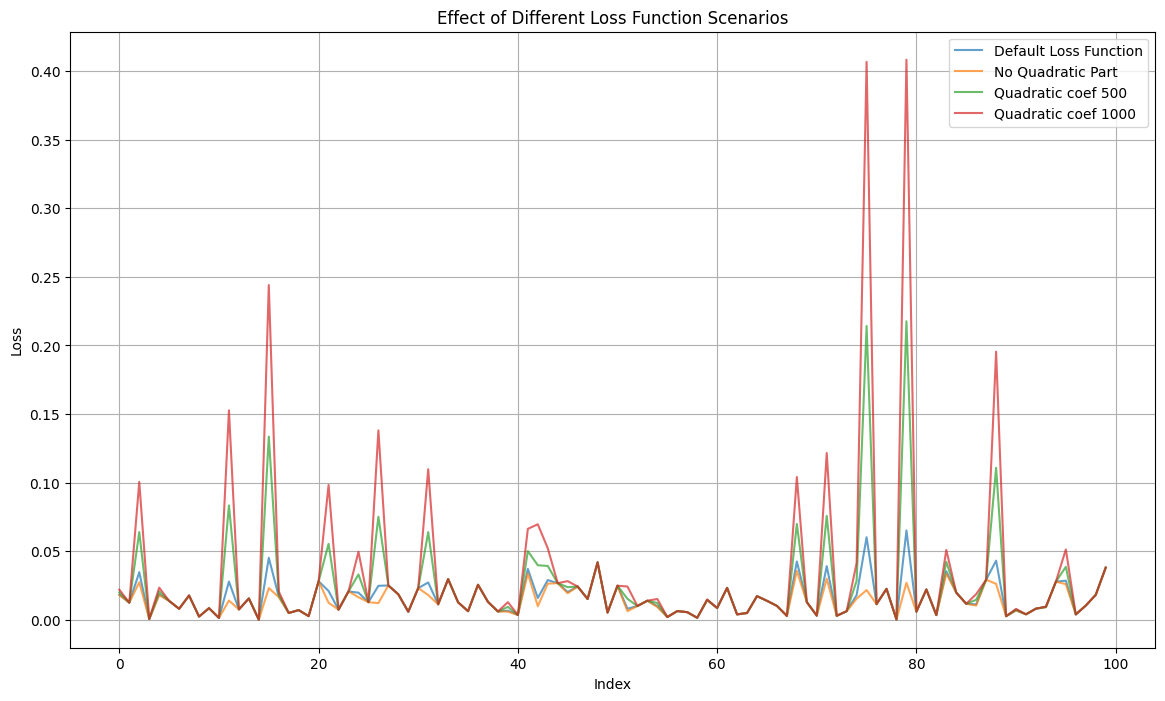

In [10]:
data['loss_default'] = data.apply(lambda row: stock_loss(row['X'], row['Y']), axis=1)
data['loss_no_quadratic'] = data.apply(lambda row: stock_loss_no_quadratic(row['X'], row['Y']), axis=1)
data['loss_coef_500'] = data.apply(lambda row: stock_loss(row['X'], row['Y'], 500), axis=1)
data['loss_coef_1000'] = data.apply(lambda row: stock_loss(row['X'], row['Y'], 1000), axis=1)

# Plot the results
plt.figure(figsize=(14, 8))

plt.plot(data.index, data['loss_default'], label='Default Loss Function', alpha=0.7)
plt.plot(data.index, data['loss_no_quadratic'], label='No Quadratic Part', alpha=0.7)
plt.plot(data.index, data['loss_coef_500'], label='Quadratic coef 500', alpha=0.7)
plt.plot(data.index, data['loss_coef_1000'], label='Quadratic coef 1000', alpha=0.7)

plt.xlabel('Index')
plt.ylabel('Loss')
plt.title('Effect of Different Loss Function Scenarios')
plt.legend()
plt.grid(True)
plt.show()

The plot shows the effect of different loss function scenarios on the loss values. The default loss function is represented by the blue line, the loss without the quadratic part is represented by the orange line, the loss with the coefficient for the quadratic part set to 500 is represented by the green line, and the loss with the coefficient for the quadratic part set to 1000 is represented by the red line. 

From the plot, it's evident that the quadratic part of the loss function has a significant impact
on the loss values. When the quadratic component is disabled, the loss values are generally
lower and less sensitive to large deviations. Increasing the coefficient of the quadratic term
increases the penalty for large errors, making the loss function more sensitive to large
deviations.

This analysis can help in understanding the trade-offs between different loss function
configurations and selecting the appropriate loss function based on the specific needs of the
model and application.

- Default Loss Function (Quadratic with Coefficient 100):
The quadratic component of the loss function penalizes large deviations heavily. Outliers,
which by definition have large deviations, will disproportionately increase the loss value.
During training, the model may place excessive emphasis on outliers, potentially leading to
overfitting. The model parameters might be adjusted to minimize the loss caused by these
few extreme values, which can reduce its overall performance on normal data.

- No Quadratic Part (Linear Only):
Without the quadratic component, the loss function becomes linear. This means that each
error contributes to the loss in a more uniform manner.
This configuration is more robust to outliers because it doesn’t disproportionately penalize
large errors. Outliers still affect the loss but to a lesser extent than in the quadratic case.

- Quadratic Coefficient 500 and 1000:
Increasing the quadratic coefficient further amplifies the impact of outliers. With coefficients
of 500 and 1000, outliers will cause extremely high loss values.
The higher the quadratic coefficient, the more the model is likely to overfit to the outliers.
This can severely impact the generalizability of the model, making it perform poorly on
unseen data.

- Outliers can significantly skew the results of the model, especially when using loss functions
with a strong quadratic component. Understanding their impact and choosing appropriate
methods to handle them is essential for building robust and accurate models.